In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris['data'],
                 columns=iris['feature_names'])
df.to_csv('iris.csv',encoding='utf-8',index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
df['ans'] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [9]:
cluster.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Text(0.5, 0, 'petal length')

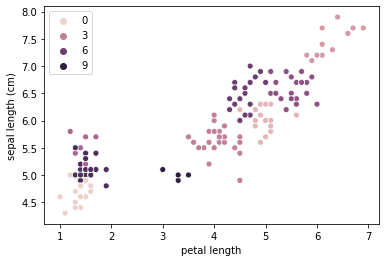

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=df['petal length (cm)'],
                y=df['sepal length (cm)'],
                hue=cluster.labels_)
plt.xlabel('petal length')

In [20]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris['data'])
    s = silhouette_score(iris['data'], cluster.labels_)
    x.append(k)
    y.append(s)
print('K:',x)
print('Score:',y)

K: [2, 3, 4, 5, 6, 7, 8, 9]
Score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3678464984712235, 0.3566882476581684, 0.35006029596867255, 0.3459548859609926]


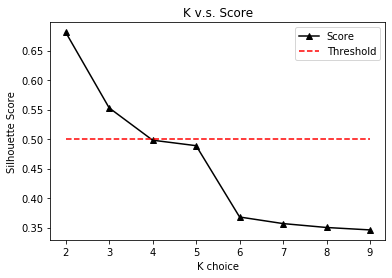

In [32]:
threshold = [0.5] * len(x)
plt.title('K v.s. Score') # Title
plt.xlabel('K choice')
plt.ylabel('Silhouette Score')
p1, = plt.plot(x, y, '^-k', label='Score')
p2, = plt.plot(x,threshold, '--r', label='Threshold')
plt.legend(handles=[p1,p2])
